# Pok&eacute;mon example (with dual defender types)

This example applies a multiplicative handicap to the Pok&eacute;mon type chart (Generation VI), including defenders with dual types. Otherwise it is the same as the other Pok&eacute;mon example.

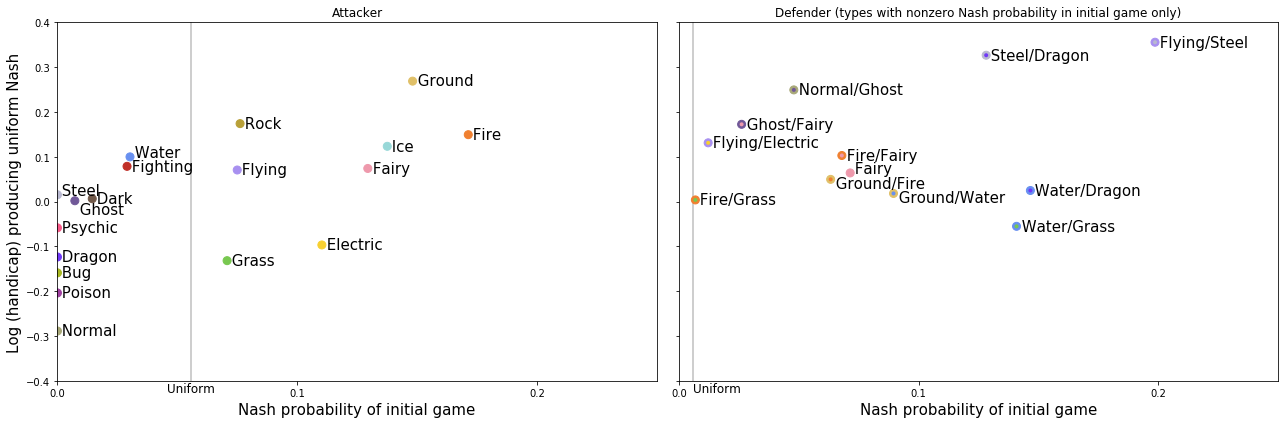

In [1]:
import _initpath

import numpy
import dataset.pokemon
import zerosum.balance
import zerosum.nash
import matplotlib
import matplotlib.pyplot as plt

# Balances the Pokemon type chart using a multiplicative handicap function.
# This one includes all possible dual-type defenses.
# Plots the handicaps versus Nash equilibrium of the original game.

# Initial payoff matrix.
type_chart = dataset.pokemon.pokemon_6_dual_defender
# Names of the Pokemon types.
row_names = type_chart.row_names
col_names = type_chart.col_names

# Single-type colors.
colors = [dataset.pokemon.pokemon_type_colors[t] for t in type_chart.row_names]

# Dual-type colors.
primary_colors = [dataset.pokemon.pokemon_type_colors[t.split('/')[0]] for t in type_chart.col_names]
secondary_colors = [dataset.pokemon.pokemon_type_colors[t.split('/')[-1]] for t in type_chart.col_names]

# Nash equilibrium of the initial game.
row_nash, col_nash = zerosum.nash.nash(type_chart.data)
# Handicaps producing a uniform Nash equilibrium.
balance = zerosum.balance.MultiplicativeBalance(type_chart.data).optimize()

# Now to plot.
dpi = 240
marker_size = 64
text_size = 15
bottom = -0.4
top = 0.4
loc = matplotlib.ticker.MultipleLocator(base=0.1)

# Plot attacker and defender on separate subplots. Attacker first.
fig = plt.figure(figsize = (18, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax = plt.subplot(gs[0])

# Draw a line indicating where the uniform distribution would be.
uniform_x = 1.0 / len(row_nash.strategy)
ax.plot([uniform_x, uniform_x], [bottom, top],
        color='#bfbfbf', linestyle='-', zorder=0)
plt.text(uniform_x, bottom - 0.003, 'Uniform',
         fontsize = 12,
         rotation = 0,
         ha = 'center', va = 'top')

# Scatter plot of handicaps vs. Nash of initial game.
x = row_nash.strategy
y = numpy.log(balance.row_handicaps)
y -= numpy.mean(y)

ax.scatter(x, y, s = marker_size, c = colors)

# Label each scatter plot point with the type name.
for pointx, pointy, name, color in zip(x, y, row_names, colors):
    ha = 'left'
    # manual adjustment
    if name in ['Steel', 'Water']:
        pointy += 0.01
    if name == 'Ghost':
        pointy -= 0.02
    
    name = ' ' + name + ' '
    plt.text(pointx, pointy, name,
             fontsize = text_size,
             rotation = 0,
             ha = ha, va = 'center')

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Attacker')

ax.set_xlabel('Nash probability of initial game', fontsize = text_size)
ax.set_ylabel('Log (handicap) producing uniform Nash', fontsize = text_size)

ax.set_xlim(left=0.0, right = 0.25)
ax.set_ylim(bottom=bottom, top = top)

# Now for the defender plot.
ax = plt.subplot(gs[1])

uniform_x = 1.0 / len(col_nash.strategy)
ax.plot([uniform_x, uniform_x], [bottom, top],
        color='#bfbfbf', linestyle='-', zorder=0)
plt.text(uniform_x, bottom - 0.003, 'Uniform',
         fontsize = 12,
         rotation = 0,
         ha = 'left', va = 'top')

x = col_nash.strategy
y = numpy.log(balance.col_handicaps)
y -= numpy.mean(y)

# Remove zero-weight strategies.
sel_nz = x > 0.0
x_nz = x[sel_nz]
y_nz = y[sel_nz]
col_names_nz = [name for i, name in enumerate(col_names) if sel_nz[i]]
primary_colors_nz = [c for i, c in enumerate(primary_colors) if sel_nz[i]]
secondary_colors_nz = [c for i, c in enumerate(secondary_colors) if sel_nz[i]]

ax.scatter(x_nz, y_nz, s = marker_size, c = primary_colors_nz)
ax.scatter(x_nz, y_nz, s = marker_size / 4, linewidths = 0, c = secondary_colors_nz, zorder=1.5)

for pointx, pointy, name in zip(x_nz, y_nz, col_names_nz):
    ha = 'left'
    # manual adjustment
    if name == 'Fairy':
        pointy += 0.01
    if name in ['Ground/Fire', 'Ground/Water']:
        pointy -= 0.01
    
    name = ' ' + name + ' '
    plt.text(pointx, pointy, name,
             fontsize = text_size,
             rotation = 0,
             ha = ha, va = 'center')

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Defender (types with nonzero Nash probability in initial game only)')

ax.set_xlabel('Nash probability of initial game', fontsize = text_size)
ax.yaxis.set_ticklabels([])

ax.set_xlim(left=0.0, right = 0.25)
ax.set_ylim(bottom=bottom, top = top)

plt.tight_layout()

plt.savefig("out/pokemon_dual_scatter.png", dpi = dpi, bbox_inches = "tight")
plt.show()